# Exploratory Data Analysis of graph data

**Libraries**

1. NetworkX: https://networkx.org/
2. scikit-network: https://scikit-network.readthedocs.io/en/latest/

In [30]:
# Load modules
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(13,6)})

import networkx as nx

In [1]:
%%bash
cd ../input
ls

collins.txt
ex.csv


In [ ]:
# TODO
# - Create synthetic datasets
# - Plot graph, degrees distribution, edge prob distributions
# - Find central nodes


## Datasets

You are free to use any **probabilistic graph** available. A small dataset will be given. However, since not many
real-life probabilistic networks are publicly available, you may work use synthetic datasets as follows: you
may take any undirected network and simply assign probabilities to the edges by using a probability
distribution such as uniform, normal, power-law, etc.

Two excellent repositories for graph data are:
1. http://snap.stanford.edu/data/index.html
2. http://networkrepository.com/

In [8]:
# Load datasets
collins_df = pd.read_table("../input/collins.txt", sep=" ", header=None)

In [12]:
collins_df.columns = ["src","dst", "prob"]

In [18]:
collins_df.head(6)

,src,dst,prob
0,0,1,0.983749
1,0,2,0.983363
2,0,3,0.952126
3,0,4,0.990000
4,0,5,0.948626
5,6,7,0.896235


In [14]:
collins_df.shape

(9074, 3)

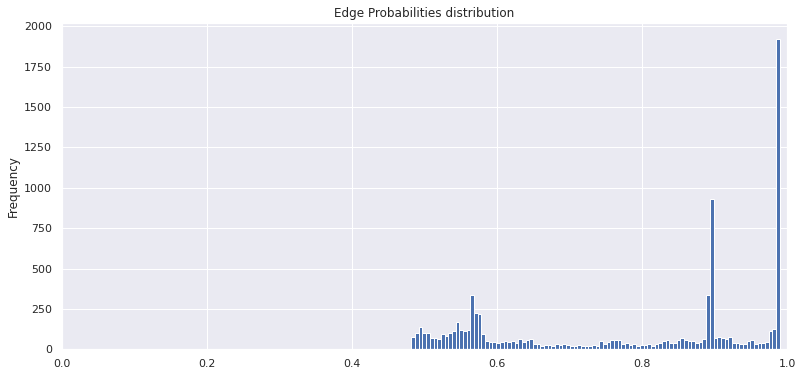

In [34]:
collins_df["prob"].plot.hist(title="Edge Probabilities distribution", bins=100, xlim=[0,1]);

In [15]:
# Create graph
G = nx.from_pandas_edgelist(df=collins_df, source='src', target='dst', edge_attr="prob")

In [38]:
# Print graph properties
print(f" Number of nodes: {G.number_of_nodes()}")
print(f" Number of edges: {G.number_of_edges()}")
print(f" Is directed?: {G.is_directed()}")

 Number of nodes: 1622
 Number of edges: 9074
 Is directed?: False


In [40]:
# list(G.nodes)

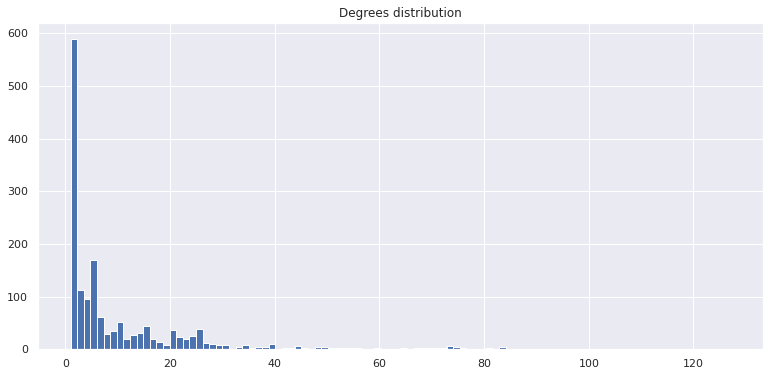

In [47]:
# Plot degree distribution
plt.hist(dict(G.degree()).values(), bins=100)
plt.title("Degrees distribution");

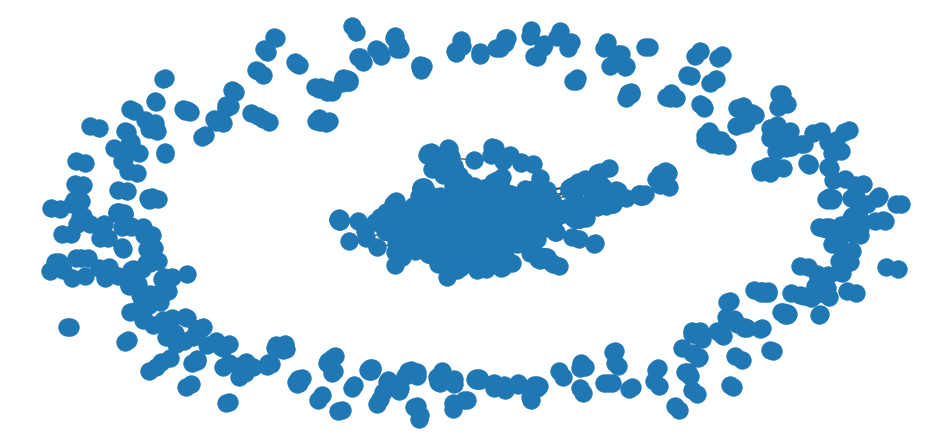

In [48]:
# Plot graph
nx.draw(G)

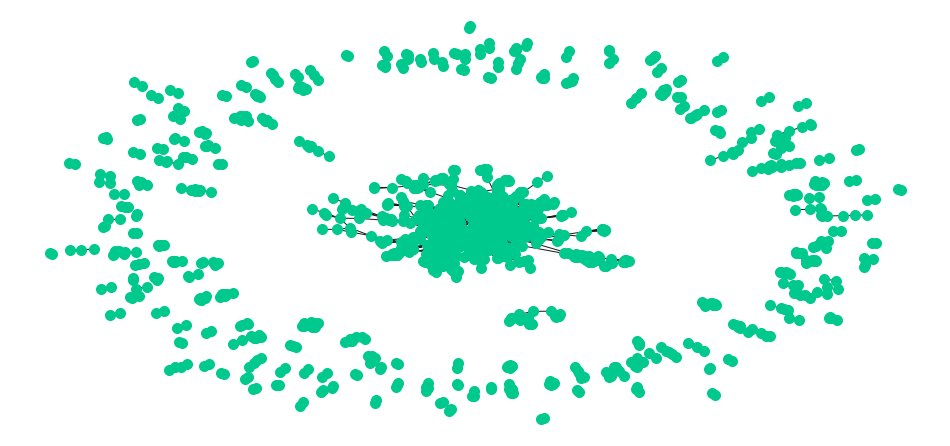

In [50]:
nx.draw_spring(G, node_size=100, node_color="#00C98D", with_labels=False)